### Cài đặt thư viện

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
trending_videos = pd.read_csv('Data/trending_videos.csv')
trending_videos_unique = pd.read_csv('Data/trending_videos_unique.csv')

### 1. Tổng quan

#### 1.1. Thời điểm đăng lên trong ngày

In [3]:
upload_time = trending_videos_unique[['published_at']].copy()

upload_time['published_at'] = pd.to_datetime(upload_time['published_at'])

upload_time['hour'] = upload_time['published_at'].dt.hour

time_ranges = [f'{i}h - {i+1}h' for i in range(24)]

video_counts = [upload_time[(upload_time['hour'] >= i) & (upload_time['hour'] < i+1)].shape[0] for i in range(24)]

time_video_df = pd.DataFrame({'Time Range': time_ranges, 'Video Count': video_counts})

time_video_df

,Time Range,Video Count
0,0h - 1h,60
1,1h - 2h,32
2,2h - 3h,18
3,3h - 4h,22
4,4h - 5h,34
5,5h - 6h,25
6,6h - 7h,18
7,7h - 8h,18
8,8h - 9h,34
9,9h - 10h,58


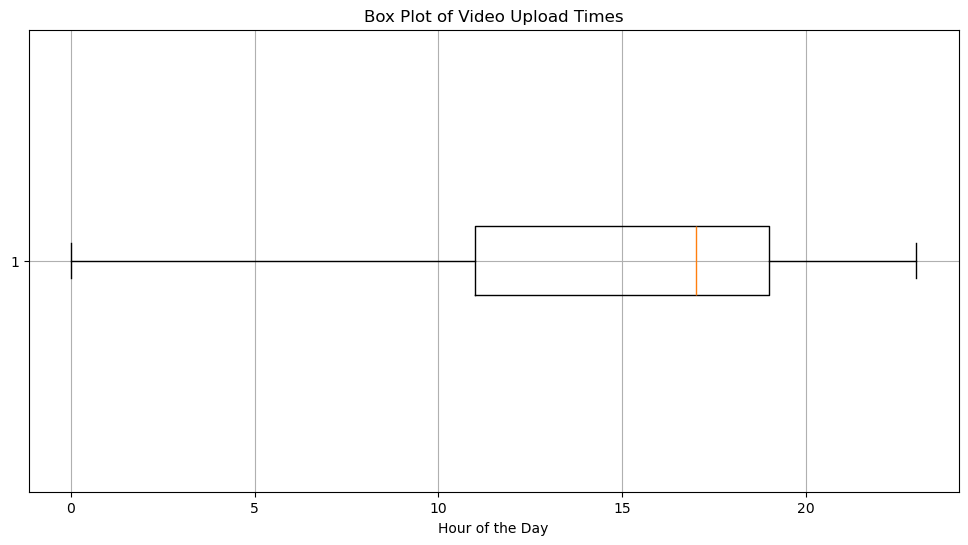

In [4]:
plt.figure(figsize=(12, 6))
plt.boxplot(upload_time['hour'], vert=False)
plt.xlabel('Hour of the Day')
plt.title('Box Plot of Video Upload Times')
plt.grid(True)
plt.show()

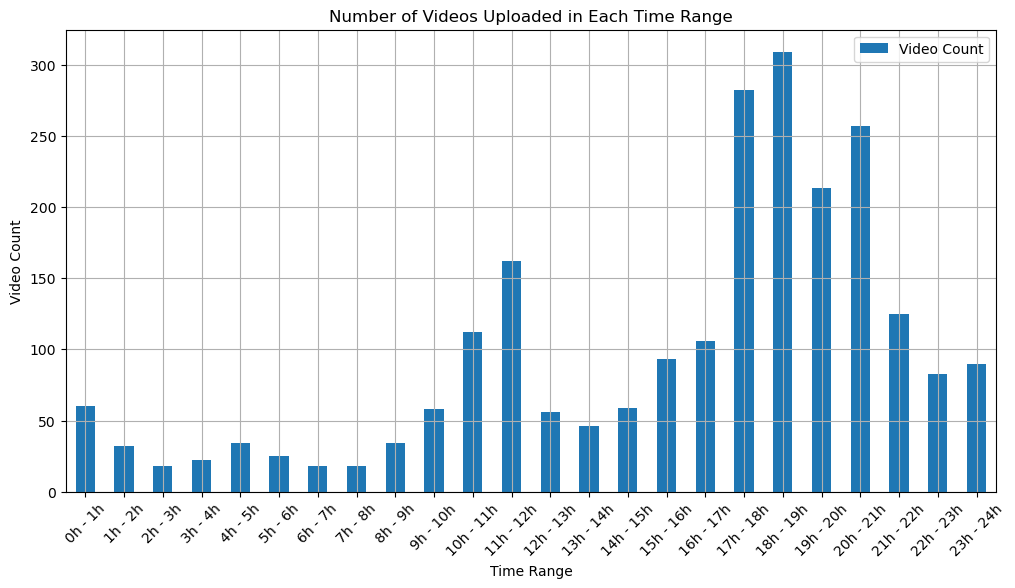

In [5]:
time_video_df.plot(x='Time Range', y='Video Count', kind='bar', figsize=(12, 6))
plt.xlabel('Time Range')
plt.ylabel('Video Count')
plt.title('Number of Videos Uploaded in Each Time Range')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

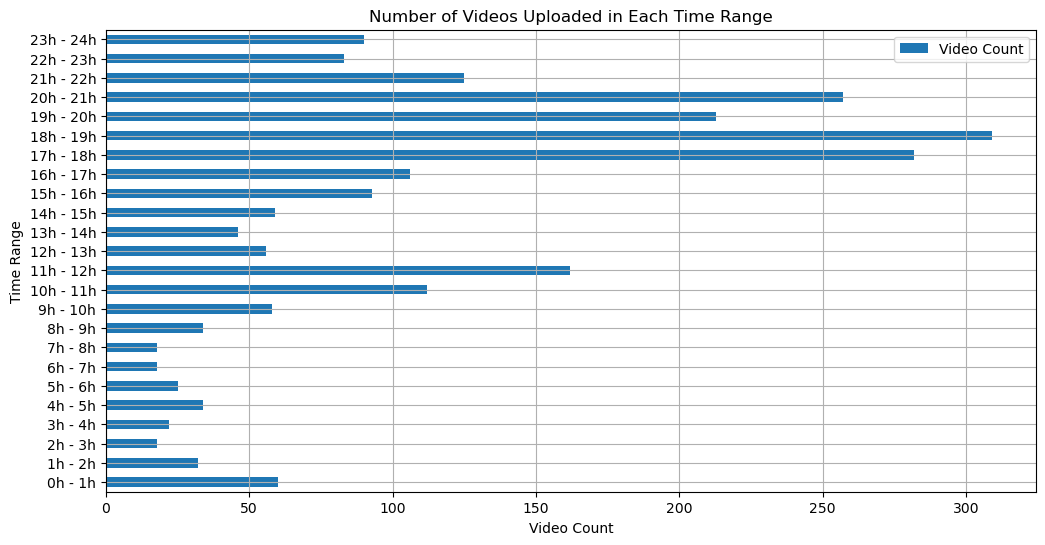

In [6]:
time_video_df.plot(x='Time Range', y='Video Count', kind='barh', figsize=(12, 6))
plt.xlabel('Video Count')
plt.ylabel('Time Range')
plt.title('Number of Videos Uploaded in Each Time Range')
plt.xticks(rotation=0)
plt.grid(True)
plt.show()

#### 1.2. Thời gian tồn tại trên trending

In [7]:
time_on_trending = trending_videos_unique[['trending_time']].copy()

time_on_trending = time_on_trending.groupby('trending_time').size().reset_index(name='frequency')

time_on_trending['trending_time'] = pd.to_timedelta(time_on_trending['trending_time'])

time_on_trending = time_on_trending.sort_values(by='trending_time')

time_on_trending

,trending_time,frequency
0,1 days,148
11,2 days,133
18,3 days,153
19,4 days,187
20,5 days,190
21,6 days,200
22,7 days,218
23,8 days,191
24,9 days,159
1,10 days,143


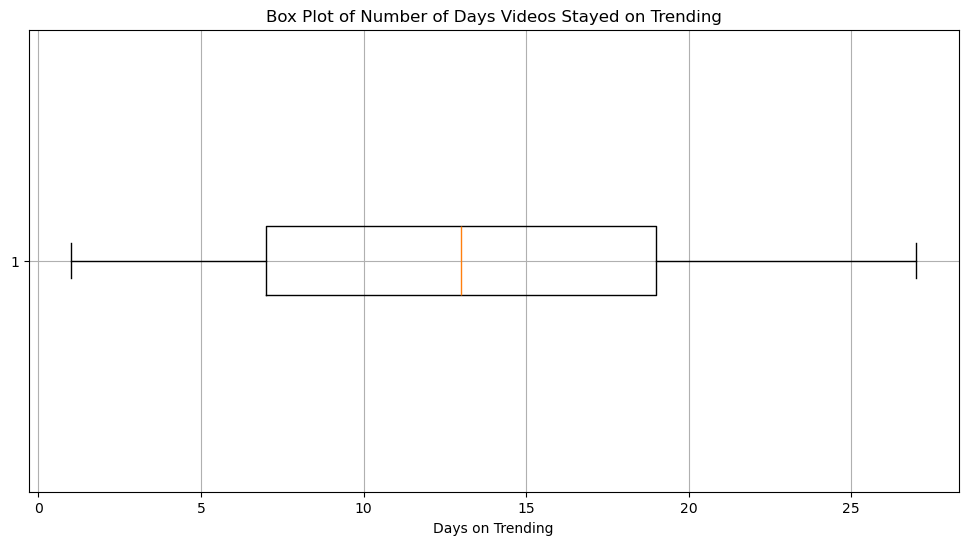

In [8]:
time_on_trending['days_on_trending'] = time_on_trending['trending_time'].dt.days

plt.figure(figsize=(12, 6))
plt.boxplot(time_on_trending['days_on_trending'], vert=False)
plt.xlabel('Days on Trending')
plt.title('Box Plot of Number of Days Videos Stayed on Trending')
plt.grid(True)
plt.show()

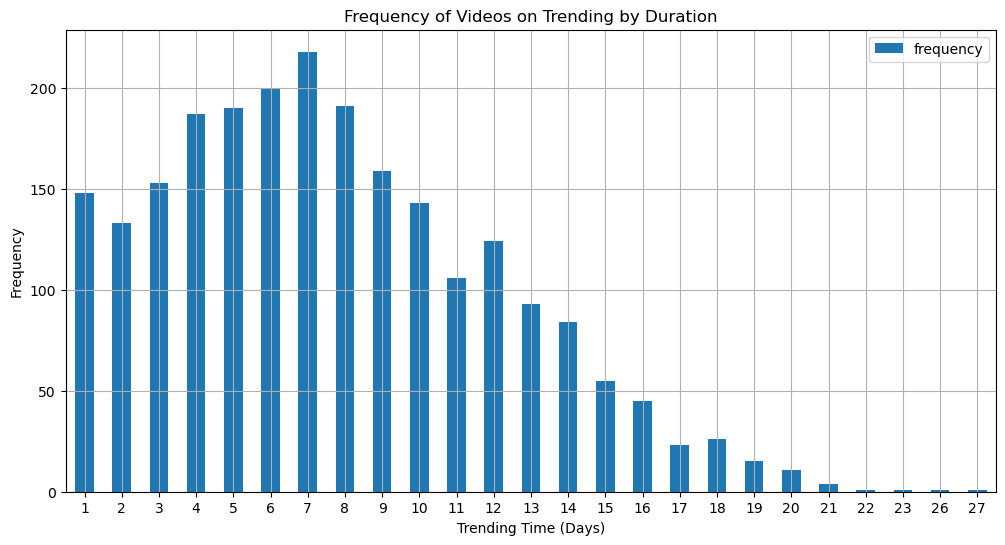

In [9]:
time_on_trending.plot(x='days_on_trending', y='frequency', kind='bar', figsize=(12, 6))
plt.xlabel('Trending Time (Days)')
plt.ylabel('Frequency')
plt.title('Frequency of Videos on Trending by Duration')
plt.xticks(rotation=0)
plt.grid(True)
plt.show()

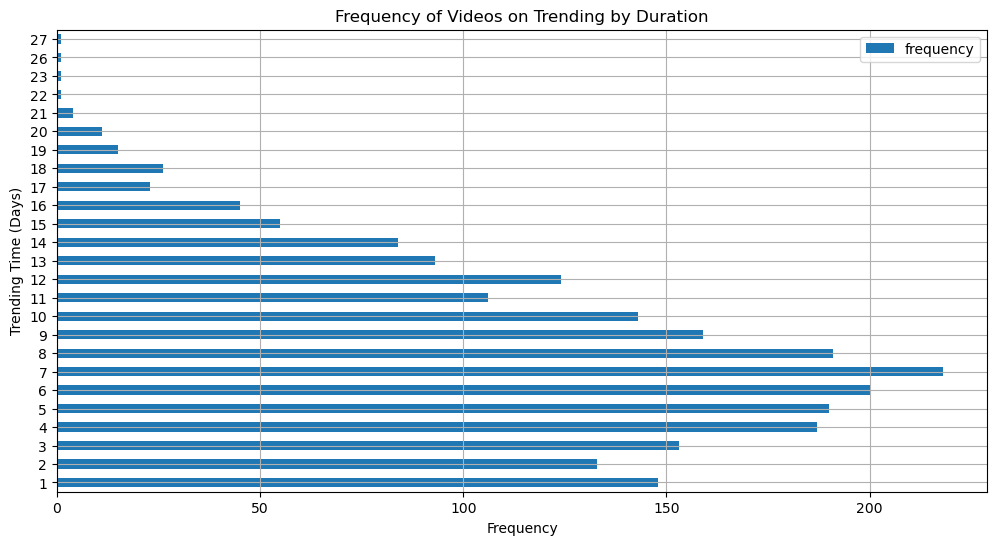

In [10]:
time_on_trending.plot(x='days_on_trending', y='frequency', kind='barh', figsize=(12, 6))
plt.xlabel('Frequency')
plt.ylabel('Trending Time (Days)')
plt.title('Frequency of Videos on Trending by Duration')
plt.grid(True)
plt.show()

### 2. Thời gian

#### 2.1. Trung bình tương tác

In [11]:
pd.options.display.float_format = '{:,.0f}'.format
general_videos = trending_videos[["view_count", "like_count", "comment_count"]].copy()
general_videos.describe()

,view_count,like_count,comment_count
count,"17,512","17,512","17,512"
mean,"16,631,531","440,410","5,097"
std,"29,073,052","1,001,456","22,914"
min,"187,782",0,0
25%,"1,703,761","28,766",135
50%,"3,495,725","63,612",427
75%,"17,990,534","323,578","2,064"
max,"290,801,447","11,040,218","438,822"


In [12]:
general_month = trending_videos[["snapshot_date", "view_count", "like_count", "comment_count"]].copy()

general_month['snapshot_date'] = pd.to_datetime(general_month['snapshot_date'])

general_month['snapshot_date'] = general_month['snapshot_date'].dt.to_period('M')

general_month = general_month.groupby('snapshot_date').mean().reset_index()

general_month

,snapshot_date,view_count,like_count,comment_count
0,2023-11,"7,774,582","209,155","7,430"
1,2023-12,"8,396,831","247,525","3,497"
2,2024-01,"11,770,799","308,438","2,803"
3,2024-02,"16,946,634","421,504","3,429"
4,2024-03,"19,947,261","515,162","6,439"
5,2024-04,"18,610,296","520,917","4,341"
6,2024-05,"22,734,065","600,849","3,302"
7,2024-06,"20,153,998","526,412","6,100"
8,2024-07,"21,877,066","660,230","9,501"
9,2024-08,"16,164,299","434,596","6,374"


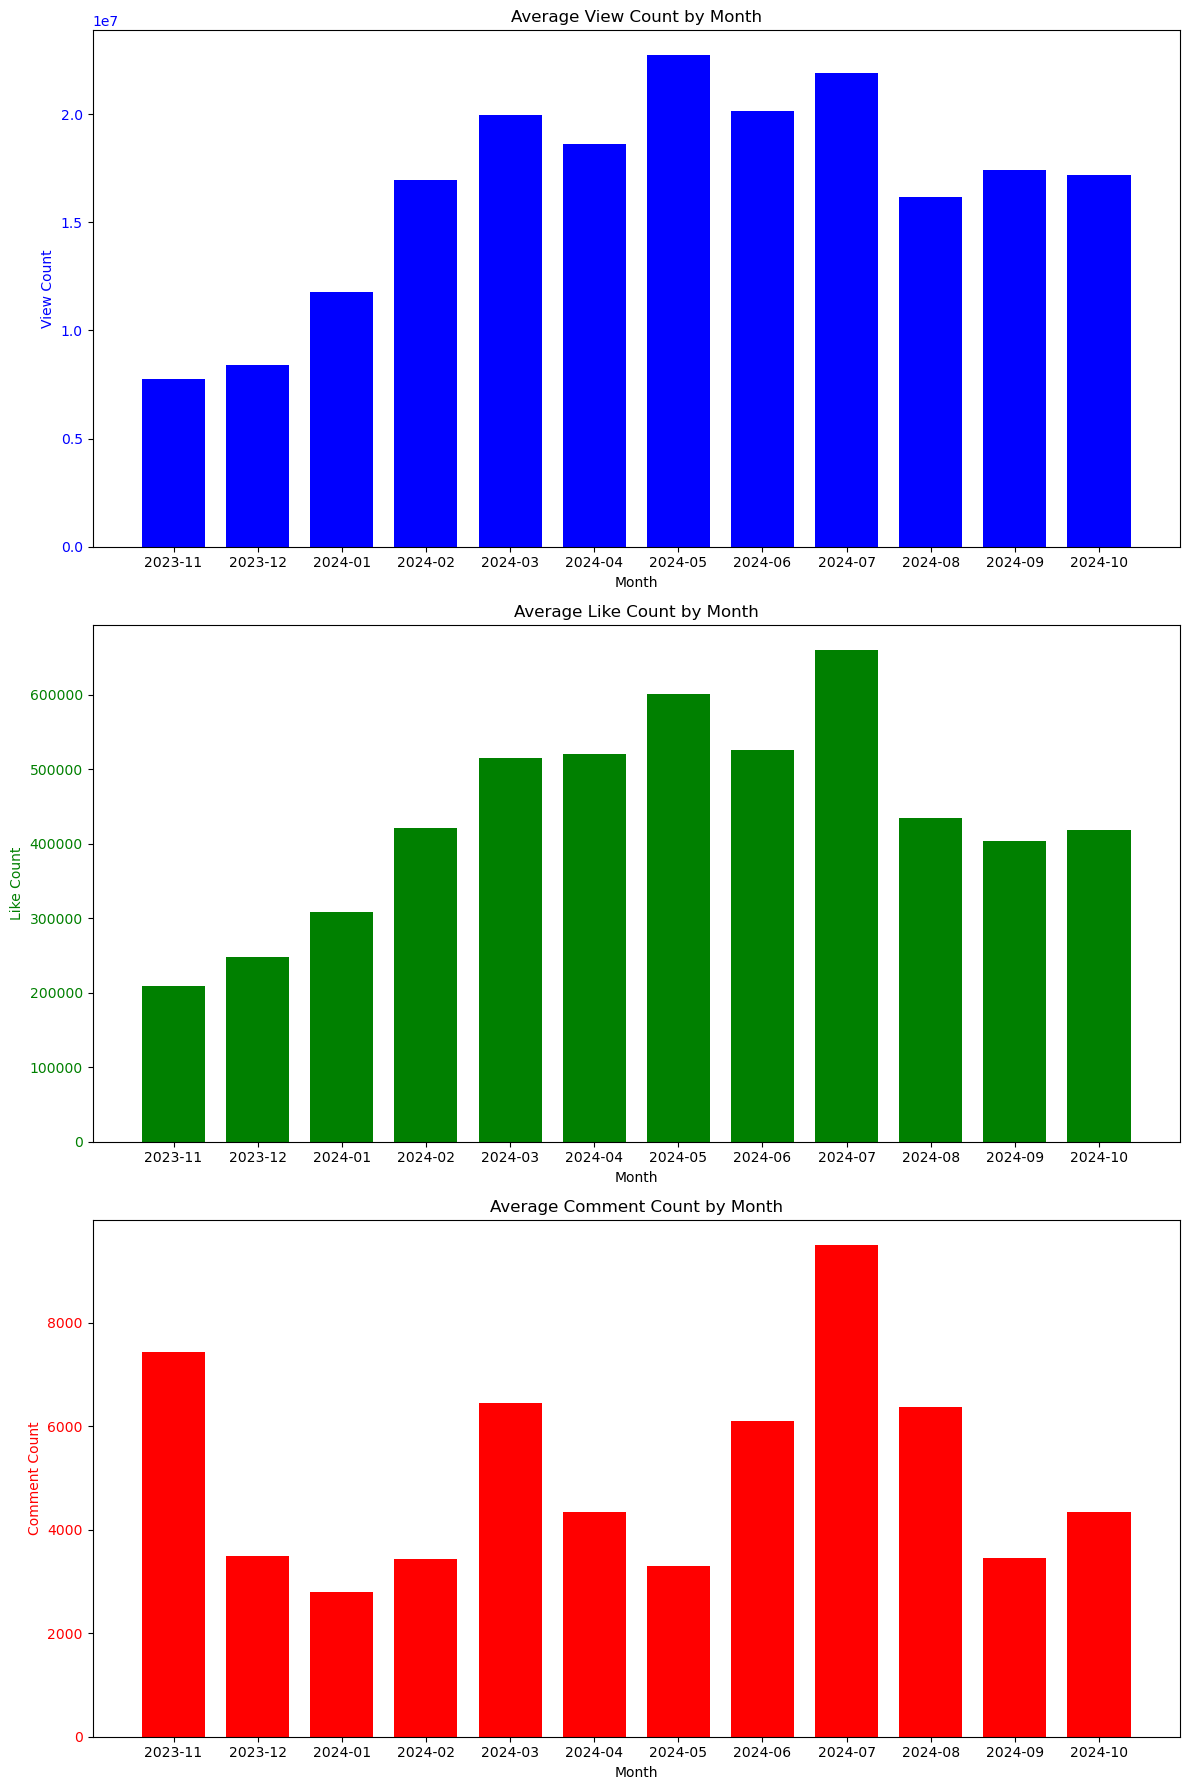

In [13]:
x = range(len(general_month['snapshot_date']))
width = 0.75
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 18))

ax1.bar(x, general_month['view_count'], width=width, label='View Count', color='b')
ax1.set_xlabel('Month')
ax1.set_ylabel('View Count', color='b')
ax1.set_xticks(x)
ax1.set_xticklabels(general_month['snapshot_date'].astype(str))
ax1.tick_params(axis='y', labelcolor='b')
ax1.set_title('Average View Count by Month')

ax2.bar(x, general_month['like_count'], width=width, label='Like Count', color='g')
ax2.set_xlabel('Month')
ax2.set_ylabel('Like Count', color='g')
ax2.set_xticks(x)
ax2.set_xticklabels(general_month['snapshot_date'].astype(str))
ax2.tick_params(axis='y', labelcolor='g')
ax2.set_title('Average Like Count by Month')

ax3.bar(x, general_month['comment_count'], width=width, label='Comment Count', color='r')
ax3.set_xlabel('Month')
ax3.set_ylabel('Comment Count', color='r')
ax3.set_xticks(x)
ax3.set_xticklabels(general_month['snapshot_date'].astype(str))
ax3.tick_params(axis='y', labelcolor='r')
ax3.set_title('Average Comment Count by Month')

fig.tight_layout()
plt.show()


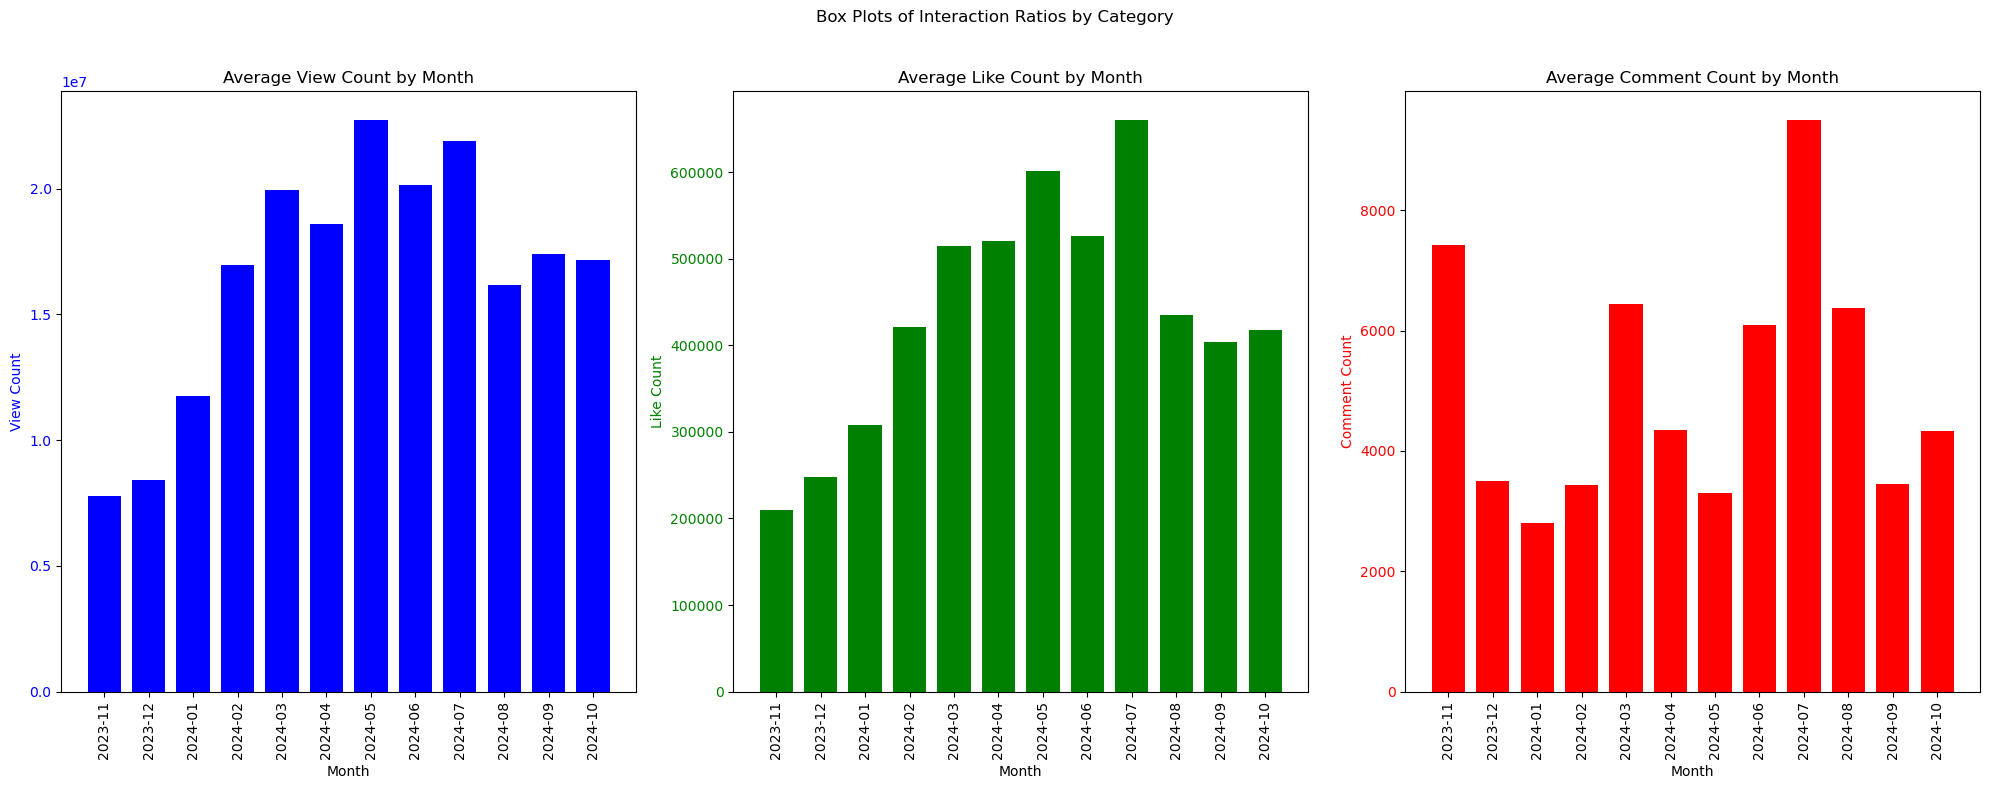

In [14]:
ig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 8))

axes[0].bar(x, general_month['view_count'], width=width, label='View Count', color='b')
axes[0].set_xlabel('Month')
axes[0].set_ylabel('View Count', color='b')
axes[0].set_xticks(x)
axes[0].set_xticklabels(general_month['snapshot_date'].astype(str), rotation=90)
axes[0].tick_params(axis='y', labelcolor='b')
axes[0].set_title('Average View Count by Month')

axes[1].bar(x, general_month['like_count'], width=width, label='Like Count', color='g')
axes[1].set_xlabel('Month')
axes[1].set_ylabel('Like Count', color='g')
axes[1].set_xticks(x)
axes[1].set_xticklabels(general_month['snapshot_date'].astype(str), rotation=90)
axes[1].tick_params(axis='y', labelcolor='g')
axes[1].set_title('Average Like Count by Month')

axes[2].bar(x, general_month['comment_count'], width=width, label='Comment Count', color='r')
axes[2].set_xlabel('Month')
axes[2].set_ylabel('Comment Count', color='r')
axes[2].set_xticks(x)
axes[2].set_xticklabels(general_month['snapshot_date'].astype(str), rotation=90)
axes[2].tick_params(axis='y', labelcolor='r')
axes[2].set_title('Average Comment Count by Month')

plt.suptitle('Box Plots of Interaction Ratios by Category')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

#### 2.2. Độ dài video

In [15]:
duration_videos = trending_videos[['snapshot_date', 'duration']].copy()

duration_videos['month'] = pd.to_datetime(duration_videos['snapshot_date']).dt.to_period('M')

bins = [pd.Timedelta(minutes=0), pd.Timedelta(minutes=1), pd.Timedelta(minutes=10), pd.Timedelta(minutes=60), pd.Timedelta(hours=24)]

labels = ['<1p', '1-10p', '10-60p', '>60p']

duration_videos['duration_time'] = pd.cut(duration_videos['duration'], bins=bins, labels=labels, right=False)

duration_videos = duration_videos.groupby(['month', 'duration_time'], observed=False).size().unstack(fill_value=0)

duration_videos


duration_time,<1p,1-10p,10-60p,>60p
month,,,,
2023-11,453,424,173,386
2023-12,777,291,146,245
2024-01,847,212,117,216
2024-02,998,196,29,126
2024-03,948,288,56,105
2024-04,1063,223,86,72
2024-05,1191,157,77,107
2024-06,997,256,134,77
2024-07,912,278,53,248


In [16]:
pd.options.display.float_format = None

duration_percentage = duration_videos.div(duration_videos.sum(axis=1), axis=0) * 100

duration_percentage

duration_time,<1p,1-10p,10-60p,>60p
month,,,,
2023-11,31.545961,29.526462,12.047354,26.880223
2023-12,53.255655,19.945168,10.006854,16.792324
2024-01,60.847701,15.229885,8.405172,15.517241
2024-02,73.980726,14.529281,2.149741,9.340252
2024-03,67.859699,20.615605,4.008590,7.516106
2024-04,73.614958,15.443213,5.955679,4.986150
2024-05,77.741514,10.248042,5.026110,6.984334
2024-06,68.101093,17.486339,9.153005,5.259563
2024-07,61.167002,18.645205,3.554661,16.633132


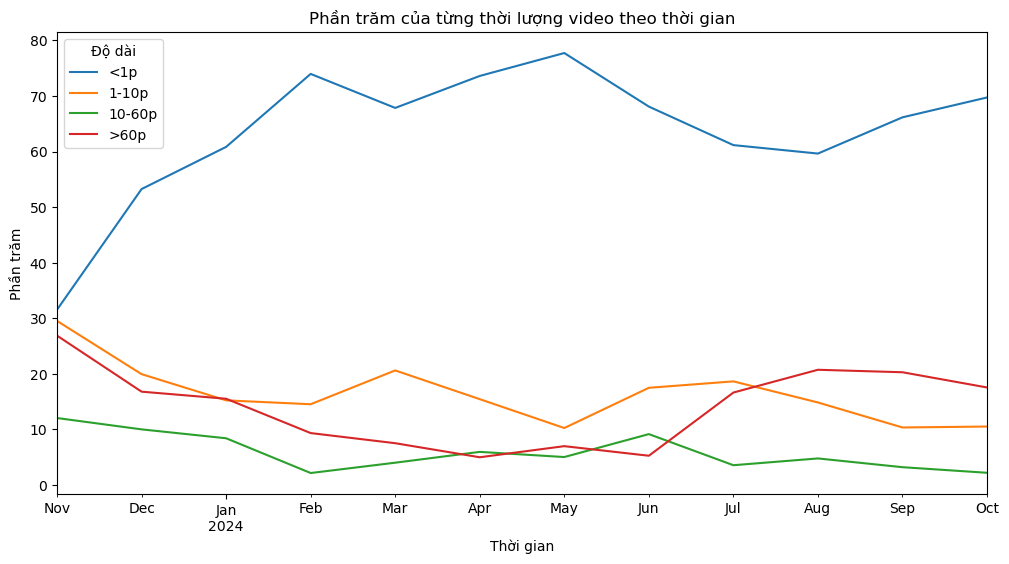

In [17]:
duration_percentage.plot(kind='line', figsize=(12, 6))
plt.title('Phần trăm của từng thời lượng video theo thời gian')
plt.xlabel('Thời gian')
plt.ylabel('Phần trăm')
plt.legend(title='Độ dài')
plt.show()

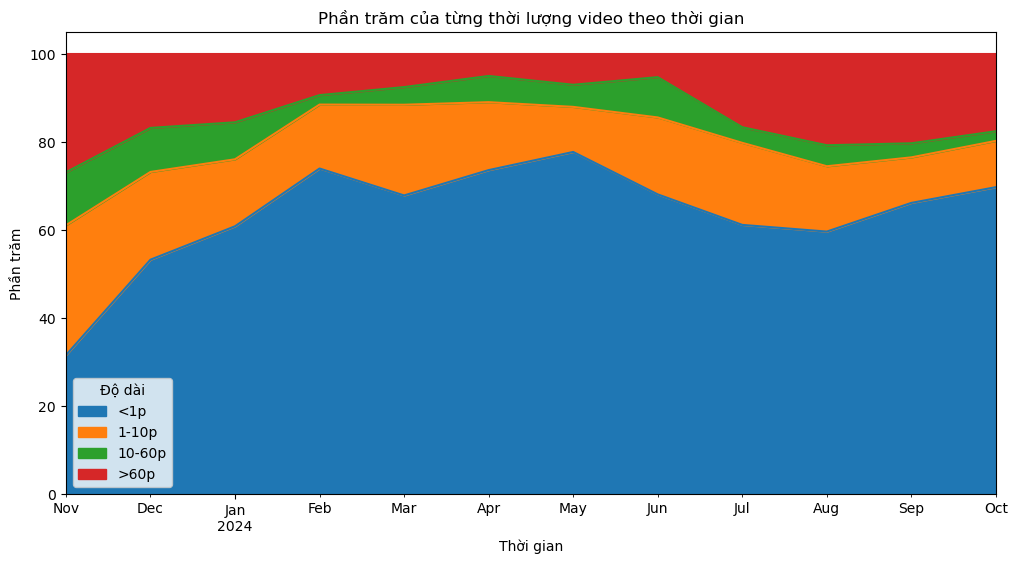

In [18]:
duration_percentage.plot(kind='area', figsize=(12, 6))
plt.title('Phần trăm của từng thời lượng video theo thời gian')
plt.xlabel('Thời gian')
plt.ylabel('Phần trăm')
plt.legend(title='Độ dài')
plt.show()

#### 2.3. Chủ đề

In [19]:
video_counts = 600

category_videos = trending_videos[['snapshot_date', 'category']].copy()

category_counts = category_videos['category'].value_counts()

category_videos['category'] = category_videos['category'].apply(lambda x: x if category_counts[x] >= video_counts else 'Others')

category_videos = category_videos.groupby(['snapshot_date', 'category']).size().unstack(fill_value=0)

category_videos.index = pd.to_datetime(category_videos.index)

category_videos['month'] = category_videos.index.to_period('M')

category_videos = category_videos.groupby('month').sum()

category_videos

category,Comedy,Entertainment,Gaming,Music,Others,People & Blogs,Sports
month,,,,,,,
2023-11,34,572,121,214,138,280,77
2023-12,61,600,115,143,165,351,24
2024-01,114,509,67,84,155,405,58
2024-02,62,507,63,89,154,436,38
2024-03,96,403,134,141,168,421,34
2024-04,67,617,96,13,184,347,120
2024-05,58,556,131,37,217,485,48
2024-06,105,461,59,142,185,412,100
2024-07,51,587,111,93,209,409,31


In [20]:
category_percentage = category_videos.div(category_videos.sum(axis=1), axis=0) * 100
category_percentage

category,Comedy,Entertainment,Gaming,Music,Others,People & Blogs,Sports
month,,,,,,,
2023-11,2.367688,39.832869,8.426184,14.902507,9.610028,19.498607,5.362117
2023-12,4.180946,41.124058,7.882111,9.801234,11.309116,24.057574,1.644962
2024-01,8.189655,36.566092,4.813218,6.034483,11.135057,29.094828,4.166667
2024-02,4.595997,37.583395,4.670126,6.597480,11.415864,32.320237,2.816901
2024-03,6.871868,28.847530,9.591983,10.093057,12.025770,30.136006,2.433787
2024-04,4.639889,42.728532,6.648199,0.900277,12.742382,24.030471,8.310249
2024-05,3.785901,36.292428,8.550914,2.415144,14.164491,31.657963,3.133159
2024-06,7.172131,31.489071,4.030055,9.699454,12.636612,28.142077,6.830601
2024-07,3.420523,39.369551,7.444668,6.237425,14.017438,27.431254,2.079142


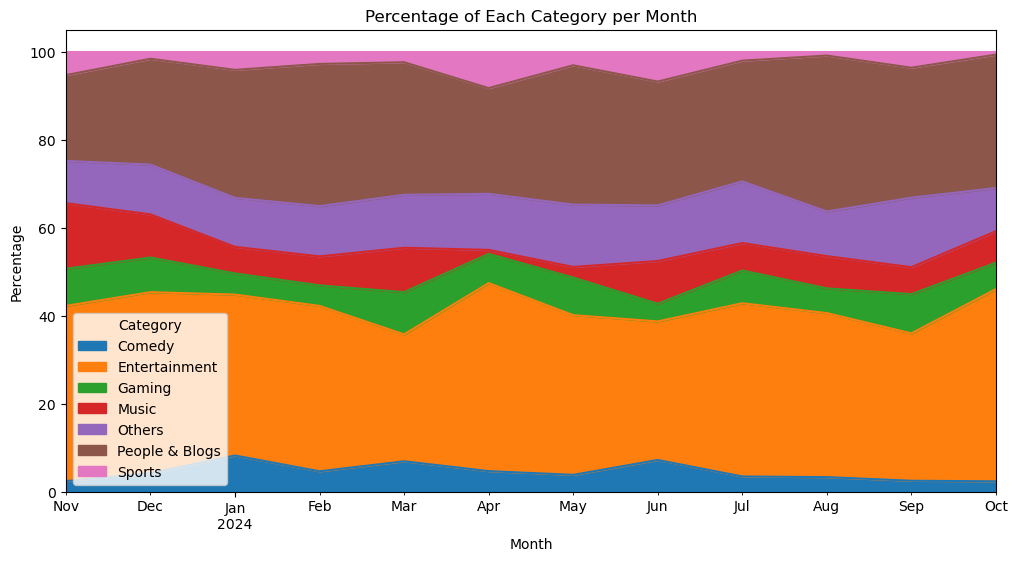

In [21]:
category_percentage.plot(kind='area', figsize=(12, 6))
plt.title('Percentage of Each Category per Month')
plt.xlabel('Month')
plt.ylabel('Percentage')
plt.legend(title='Category')
plt.show()

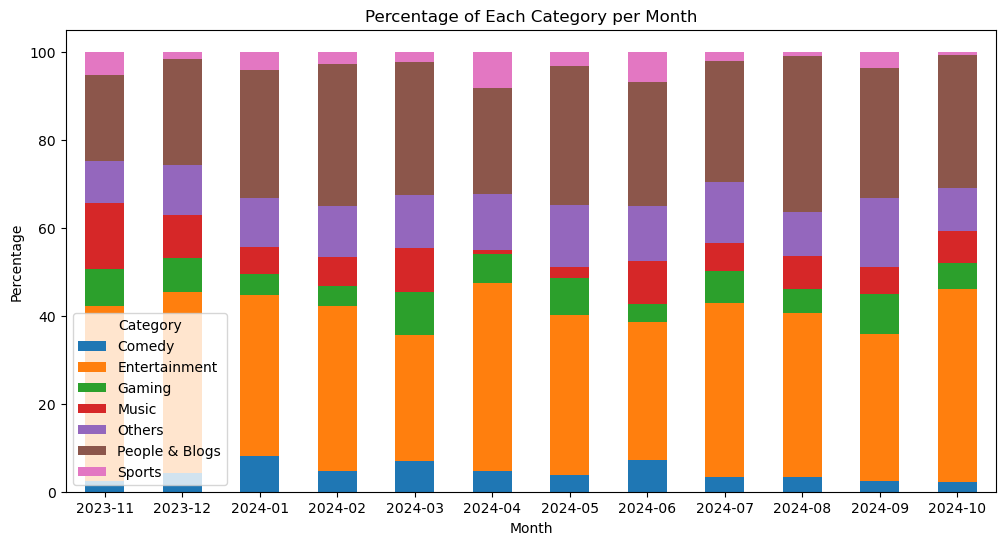

In [22]:
category_percentage.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Percentage of Each Category per Month')
plt.xlabel('Month')
plt.ylabel('Percentage')
plt.legend(title='Category')
plt.xticks(rotation=0)
plt.show()